"""
----------------------------------------------------------------------------------------
     MTP Data Viz Project: Analysis of UK, Germany and France company performances
----------------------------------------------------------------------------------------
Authors: Group 4
Date: 11/11/2020
Notes: This script involves:
       - the analysis of financials_short_term.csv and financials_long_term.csv data
       - some description of the MTP project
       - some data manipulation and cleaning
       - data transformation and graph plotting, including line charts, diverging plots and donut charts
"""

# Importing libraries and dataset

In [57]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import warnings
from pandas.core.common import SettingWithCopyWarning
from datetime import datetime, timedelta 
import datetime as dt
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
%matplotlib inline
pd.options.display.max_columns = 50
from matplotlib import rc

In [58]:
# # %% setup
rc('font',**{'family':'sans-serif','sans-serif':['Avant Garde']})
rc('text', usetex=True)

# Load data

In [59]:
short = pd.read_csv('financials__short_term.csv')
long = pd.read_csv('financials__long_term.csv')

# Data cleaning for Short dataset

In [60]:
short['month'] = short['date'].str[5:7]
short['date'] = short['date'].str[:10] 
short['date'] = pd.to_datetime(short['date'],format='%Y-%m-%d')

In [61]:
short_group = short.groupby(['sector','country','month']).agg(np.mean).reset_index()

france_short = short_group[short_group['country']=='france']
germany_short = short_group[short_group['country']=='germany']
uk_short = short_group[short_group['country']=='united kingdom']

sectors = short['sector'].unique().tolist()


## Calculate percentage changes in prices for each sector of each country in 2016

In [62]:
dataframes = [france_short,germany_short,uk_short]

for i in range(3):
    df = dataframes[i]
    df['pct_prices'] = df['price']
    for s in sectors:
        origin_price = df[df['sector']==s]['price'].iloc[0]
        df.loc[df.sector==s,'pct_prices'] = ((df.loc[df.sector==s,'pct_prices'] - origin_price) / origin_price) * 100

# Ploting UK short-term

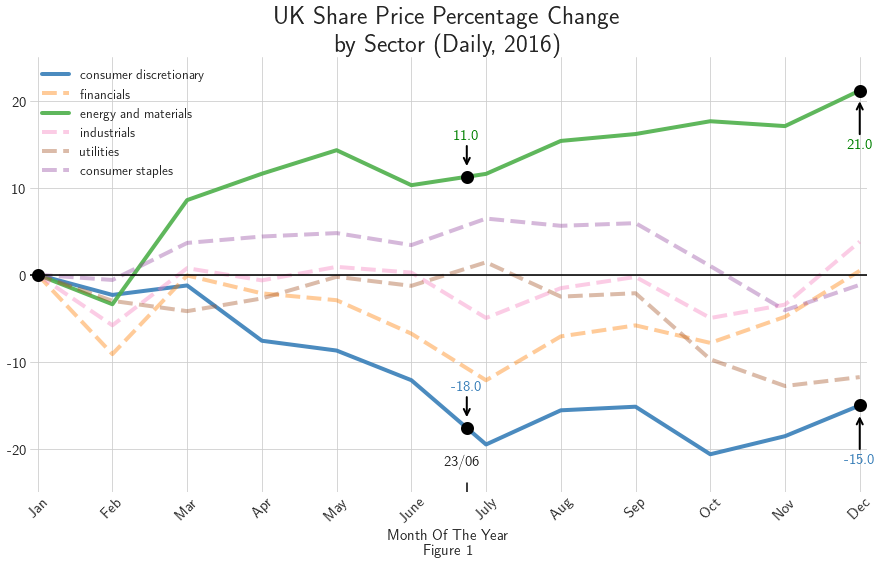

In [94]:
plt.style.use('seaborn-whitegrid')
linestyle = ['solid', 'dashed', 'dashdot', 'solid', 'dashed', 'dashdot',]
colors = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3']

brexit_date = 5+23/31
months = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
numeric_months = [0,1,2,3,4,5,6,7,8,9,10,11]

fig = plt.figure(figsize=(15,8))
ax6 = fig.add_subplot(1,1,1)                       
df = uk_short                                   
for i in range(6):
    sector = sectors[i]
    selected_rows = df[df['sector'] ==sector]
    if i not in [0,2]:
        ax6.plot(selected_rows['month'],selected_rows['pct_prices'],label=str(sector),lw=4,ls=linestyle[1],alpha=0.4,color=colors[i],zorder=1)
    if i in [0,2]:
        ax6.plot(selected_rows['month'],selected_rows['pct_prices'],label=str(sector),lw=4,ls=linestyle[3],alpha=0.9,color=colors[i],zorder=1)
        
        
        x = selected_rows['month']
        y = selected_rows['pct_prices']
        y_bx = np.interp(brexit_date+1, x,y)
        y_ey = np.interp(12, x,y)
        x_scatter = [brexit_date,11]
        y_scatter = [y_bx,y_ey]
        ax6.scatter(x_scatter,y_scatter,lw=7,color='black',zorder=2)

##Text for energy and materials
selected_rows = df[df['sector'] ==sectors[2]]
x = selected_rows['month']
y = selected_rows['pct_prices']
y_bx = np.interp(brexit_date+1, x,y)
y_ey = np.interp(12, x,y)

##Brexit
ax6.annotate(str(round(y_bx))+'%',
            xy=(brexit_date, y_bx+1),color='green',fontsize=15,xycoords='data',va="bottom", 
            ha="center",xytext=(brexit_date, y_bx+4),
            arrowprops=dict(arrowstyle="->",color='black',lw=2),)

##Scatter at origin
ax6.scatter(0,0,lw=7,color='black',zorder=2)

##End of year
ax6.annotate(str(round(y_ey))+'%',
            xy=(11, y_ey-1),color='green',fontsize=15,xycoords='data',va="bottom", 
            ha="center",xytext=(11, y_ey-7),
            arrowprops=dict(arrowstyle="->",color='black',lw=2),)

##Text for consumer discretionary
selected_rows = df[df['sector'] ==sectors[0]]
x = selected_rows['month']
y = selected_rows['pct_prices']
y_bx = np.interp(brexit_date+1, x,y)
y_ey = np.interp(12, x,y)

##Brexit
ax6.annotate(str(round(y_bx))+'%',
            xy=(brexit_date, y_bx+1),color=colors[0],fontsize=15,xycoords='data',va="bottom", 
            ha="center",xytext=(brexit_date, y_bx+4),
            arrowprops=dict(arrowstyle="->",color='black',lw=2),)

##End of year
ax6.annotate(str(round(y_ey))+'%',
            xy=(11, y_ey-1),color=colors[0],fontsize=15,xycoords='data',va="bottom", 
            ha="center",xytext=(11, y_ey-7),
            arrowprops=dict(arrowstyle="->",color='black',lw=2),)

##Text for brexit date
ax6.axvline(brexit_date,0,0.02,color='black',lw=1.5)
ax6.text(brexit_date-0.3,-22,'23/06',fontsize=15,fontweight=575)

#Customizing x and y tick labels
ax6.set_ylim([-25,25])
ax6.set_yticks([-20,-10,0,10,20])
ax6.set_yticklabels(labels=[-20,-10,0,10,20],fontsize=15)
ax6.set_xlim([-0.1,11.1])
ax6.set_xticks(numeric_months)
ax6.set_xticklabels(labels=months,rotation=45,fontsize=15)

#Delete top and right spines
ax6.spines["right"].set_visible(False)
ax6.spines["top"].set_visible(False)

#Legends and Labels
ax6.legend(loc='upper left',fontsize=13.5)
ax6.set_xlabel('Month Of The Year \n Figure 1',fontsize=15,fontweight=600)  
ax6.set_ylabel('% Changes',fontsize=15,fontweight=600)   

#Set Title
ax6.set_title('UK Share Price Percentage Change \n by Sector (Daily, 2016)',fontweight=600,fontsize=25)  

#Horizontal Line at 100
ax6.axhline(0,color='black',alpha=0.8,lw=2)

#Remove spines
ax6.spines['right'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['bottom'].set_visible(False)

plt.show()


# Data cleaning for Long dataset

In [64]:
long['date'] = long['date'].str[:10]
long['date'] = pd.to_datetime(long['date'],format='%Y-%m') 
long_group = long.groupby(['country','date']).agg(np.mean).reset_index()

germany_long = long_group[long_group['country']=='germany']
france_long = long_group[long_group['country']=='france']
uk_long = long_group[long_group['country']=='united kingdom']


## Calculate percentage changes in stock price 2014-2018 of each country

In [65]:
dataframes = [germany_long,france_long,uk_long]

for i in range(3):
    df = dataframes[i]
    df['pct_prices'] = df['price']
    origin_price = df['price'].iloc[0]
    df.loc[:,'pct_prices'] = ((df.loc[:,'pct_prices'] -origin_price) / origin_price)*100 

# Ploting UK, Germany, France from 2014-2018

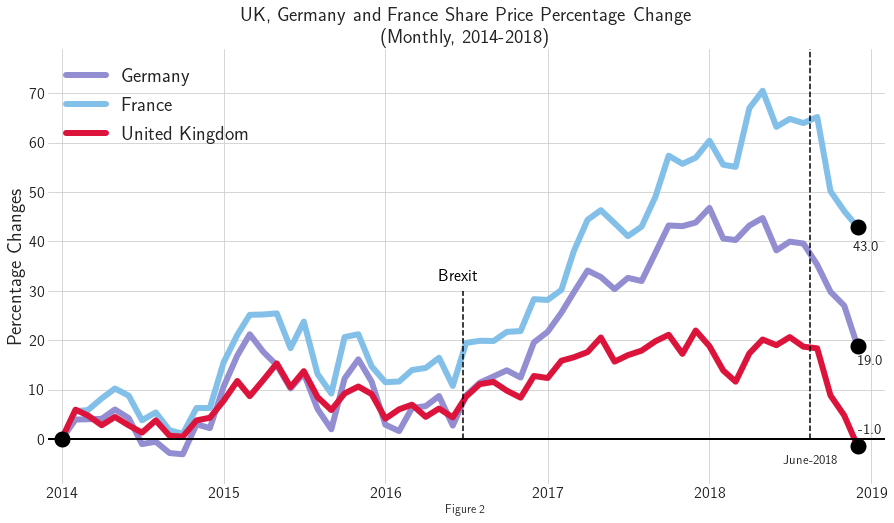

In [95]:
plt.style.use('seaborn-whitegrid')
colors = ['#938DD2', '#82C0E9', 'crimson']
dataframes = [germany_long,france_long,uk_long]
names = ['Germany','France','United Kingdom']
years = [pd.Timestamp(2014,1,1),pd.Timestamp(2015,1,1),pd.Timestamp(2016,1,1),pd.Timestamp(2017,1,1),pd.Timestamp(2018,1,1),pd.Timestamp(2019,1,1)]
x_labels = ['2014','2015','2016','2017','2018','2019']
y_labels = list(range(-10,80,10))

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
for i in range(3):
    df = dataframes[i]
    ax1.plot(df['date'],df['pct_prices'],label=names[i],lw=6,zorder=1,color=colors[i])
#labels for x-axis
ax1.set_xticks(years)
ax1.set_xticklabels(labels=x_labels,rotation=0,fontsize=16,fontweight=575)
ax1.set_xlim(pd.Timestamp(2013,12,1),pd.Timestamp(2019,2,1)) 

#Horizontal line at 100
ax1.axhline(0,color='black',lw=2)

#Labels for y-axis  
ax1.set_yticks(y_labels)
ax1.set_yticklabels(y_labels,fontsize=16,fontweight=575)
ax1.set_ylim([-9,79])

#Text for labeling countries
# plt.text(pd.Timestamp(2017,10,1),8,'United Kingdom',fontweight=600,fontsize=20)
# plt.text(pd.Timestamp(2017,11,1),37,'Germany',fontweight=600,fontsize=20)
# plt.text(pd.Timestamp(2017,10,1),62,'France',fontweight=600,fontsize=20)

#Initial index point at 100
ax1.scatter(pd.Timestamp(2014,1,1),0,lw=10,color='black',zorder=2)

#France end of 2018 index point
y_ey = france_long.loc[france_long['date'] == pd.Timestamp(2018,12,1),'pct_prices'].values
ax1.scatter(pd.Timestamp(2018,12,1),y_ey,lw=10,color='black',zorder=2)
ax1.text(pd.Timestamp(2018,11,20),38,str(round(y_ey[0]))+'%',fontsize=15)

#Germany end of 2018 index point
y_ey = germany_long.loc[germany_long['date'] == pd.Timestamp(2018,12,1),'pct_prices'].values
ax1.scatter(pd.Timestamp(2018,12,1),y_ey,lw=10,color='black',zorder=2)
ax1.text(pd.Timestamp(2018,12,1),15,str(round(y_ey[0]))+'%',fontsize=15)

#UK end of 2018 index point
y_ey = uk_long.loc[uk_long['date'] == pd.Timestamp(2018,12,1),'pct_prices'].values
ax1.scatter(pd.Timestamp(2018,12,1),y_ey,lw=10,color='black',zorder=2)
ax1.text(pd.Timestamp(2018,12,1),1,str(round(y_ey[0]))+'%',fontsize=15)

#Date of brexit
ax1.vlines(pd.Timestamp(2016,6,23),0,30,color='black',ls='--')
ax1.text(pd.Timestamp(2016,5,1),32,'Brexit',color='black',fontweight=700,fontsize=17)


#Date of drop
ax1.vlines(pd.Timestamp(2018,8,15),0,100,color='black',ls='--')
ax1.text(pd.Timestamp(2018,6,15),-5,'June-2018',fontweight=600,fontsize=13)

# remove spines
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

#Set title
ax1.set_ylabel('Percentage Changes', fontsize=20,fontweight=600)
ax1.set_title('UK, Germany and France Share Price Percentage Change \n (Monthly, 2014-2018)',fontweight=600,fontsize=20)
ax1.legend(loc='upper left',fontsize=20)
ax1.set_xlabel('Figure 2', fontsize = 12, fontweight = 600)
plt.show()
    

# Data Cleaning

In [68]:
# extract the UK
long_uk = long.loc[long['country'] == 'united kingdom', :]


In [69]:
# create a dummy for to replace Germany and France with eu
long_eu = long

# create a def to combine Germany and France into one entity 
def france_germany(element):
    """
    this function rename input with names france and germany with eu and else with united kingdom
    element: iterable variable, such as Pandas series or list
    """
    if element in ['france','germany']:
        return 'eu'
    else:
        return 'united kingdom'

long_eu['country'] = long_eu['country'].apply(france_germany)

# extract eu 
long_eu = long_eu.loc[long_eu['country'] == 'eu', :]

In [70]:
# groupby date and sector, and calculate mean accordingly
long_uk_a = long_uk.groupby(['date', 'sector'])['price'].agg(np.mean).reset_index()

long_eu_a = long_eu.groupby(['date', 'sector'])['price'].agg(np.mean).reset_index()

# Consider 6 sectors separately for the UK and EU representatives

## Consumer Discretionary

In [71]:
# uk consumer discretionary
fin_cd_uk = long_uk_a.loc[long_uk_a['sector'] == 'consumer discretionary']
cd_uk = fin_cd_uk.iloc[[0,29,59], ]
cd_uk.loc[: , 'percentage_change'] = (cd_uk['price'].pct_change())*100

# eu consumer discretionary
fin_cd_eu = long_eu_a.loc[long_eu_a['sector'] == 'consumer discretionary']
cd_eu = fin_cd_eu.iloc[[0, 29,59], ]
cd_eu.loc[: , 'percentage_change'] = (cd_eu['price'].pct_change())*100

# relative strength of the UK discretionary sector
cd_uk_rel = cd_eu[['sector']]
cd_uk_rel['relative performance'] = cd_uk.percentage_change - cd_eu.percentage_change
cd_prb = cd_uk_rel.iloc[1, 1]  
cd_pob = cd_uk_rel.iloc[2,1 ]


## Energy and Materials

In [72]:
# uk energy and materials
fin_em_uk = long_uk_a.loc[long_uk_a['sector'] == 'energy and materials']
em_uk = fin_em_uk.iloc[[0,29,59], ]
em_uk.loc[: , 'percentage_change'] = (em_uk['price'].pct_change())*100

# eu energy and materials
fin_em_eu = long_eu_a.loc[long_eu_a['sector'] == 'energy and materials']
em_eu = fin_em_eu.iloc[[0, 29,59], ]
em_eu.loc[: , 'percentage_change'] = (em_eu['price'].pct_change())*100

# relative strength of the UK energy and materials
em_uk_rel = em_eu[['sector']]
em_uk_rel['relative performance'] = em_uk.percentage_change - em_eu.percentage_change
em_prb = em_uk_rel.iloc[1,1 ]  
em_pob = em_uk_rel.iloc[2,1 ]

## Indrustrials

In [73]:
# uk indrustrials
fin_i_uk = long_uk_a.loc[long_uk_a['sector'] == 'industrials']
i_uk = fin_i_uk.iloc[[0,29,59], ]
i_uk.loc[: , 'percentage_change'] = (i_uk['price'].pct_change())*100

# eu indrustrials
fin_i_eu = long_eu_a.loc[long_eu_a['sector'] == 'industrials']
i_eu = fin_i_eu.iloc[[0, 29,59], ]
i_eu.loc[: , 'percentage_change'] = (i_eu['price'].pct_change())*100

# relative strength of the UK indrustrials
i_uk_rel = i_eu[['sector']]
i_uk_rel['relative performance'] = i_uk.percentage_change - i_eu.percentage_change
i_prb = i_uk_rel.iloc[1,1 ]  
i_pob = i_uk_rel.iloc[2,1 ]

## Consumer Stables

In [74]:
# uk consumer stables
fin_cs_uk = long_uk_a.loc[long_uk_a['sector'] ==  'consumer staples']
cs_uk = fin_cs_uk.iloc[[0,29,59], ]
cs_uk.loc[: , 'percentage_change'] = (cs_uk['price'].pct_change())*100

# eu consumer stables
fin_cs_eu = long_eu_a.loc[long_eu_a['sector'] == 'consumer staples']
cs_eu = fin_cs_eu.iloc[[0, 29,59], ]
cs_eu.loc[: , 'percentage_change'] = (cs_eu['price'].pct_change())*100

# relative strength of the UK consumer stables
cs_uk_rel = cs_eu[['sector']]
cs_uk_rel['relative performance'] = cs_uk.percentage_change - cs_eu.percentage_change
cs_prb = cs_uk_rel.iloc[1,1 ]  
cs_pob = cs_uk_rel.iloc[2,1 ]

##  Financials

In [75]:
# uk financials
fin_f_uk = long_uk_a.loc[long_uk_a['sector'] ==  'financials']
f_uk = fin_f_uk.iloc[[0,29,59], ]
f_uk.loc[: , 'percentage_change'] = (f_uk['price'].pct_change())*100

# eu financials
fin_f_eu = long_eu_a.loc[long_eu_a['sector'] == 'financials']
f_eu = fin_f_eu.iloc[[0, 29,59], ]
f_eu.loc[: , 'percentage_change'] = (f_eu['price'].pct_change())*100

# relative strength of the UK consumer stables
f_uk_rel = f_eu[['sector']]
f_uk_rel['relative performance'] = f_uk.percentage_change - f_eu.percentage_change
f_prb = f_uk_rel.iloc[1,1 ]  
f_pob = f_uk_rel.iloc[2,1 ]

## Utilities

In [76]:
# uk utilities
fin_u_uk = long_uk_a.loc[long_uk_a['sector'] ==  'utilities']
u_uk = fin_u_uk.iloc[[0,29,59], ]
u_uk.loc[: , 'percentage_change'] = (u_uk['price'].pct_change())*100

# eu utilities
fin_u_eu = long_eu_a.loc[long_eu_a['sector'] == 'utilities']
u_eu = fin_u_eu.iloc[[0, 29,59], ]
u_eu.loc[: , 'percentage_change'] = (u_eu['price'].pct_change())*100

# relative strength of the UK utilities
u_uk_rel = u_eu[['sector']]
u_uk_rel['relative performance'] = u_uk.percentage_change - u_eu.percentage_change
u_prb = u_uk_rel.iloc[1,1]  
u_pob = u_uk_rel.iloc[2,1 ]

## Combine above dataframes

### Pre-Brexit

In [77]:
# populate a dataframe to use in the pre-Brexit visualization
rel_str_prb = [cd_prb,em_prb,i_prb,cs_prb,f_prb,u_prb]
sectors = ['Consumer \n Discretionary', 'Energy and \n Materials', 'Industrials', 'Consumer \n Staples', 'Financials', 'Utilities']
res_preb = pd.DataFrame({'sector' : sectors, 'relative_performance_before_brexit' : rel_str_prb})
res_preb['colors'] = ['crimson' if x < 0 else 'olivedrab' for x in res_preb['relative_performance_before_brexit']]

res_preb.sort_values('relative_performance_before_brexit', inplace=True)
res_preb.reset_index(inplace=True)

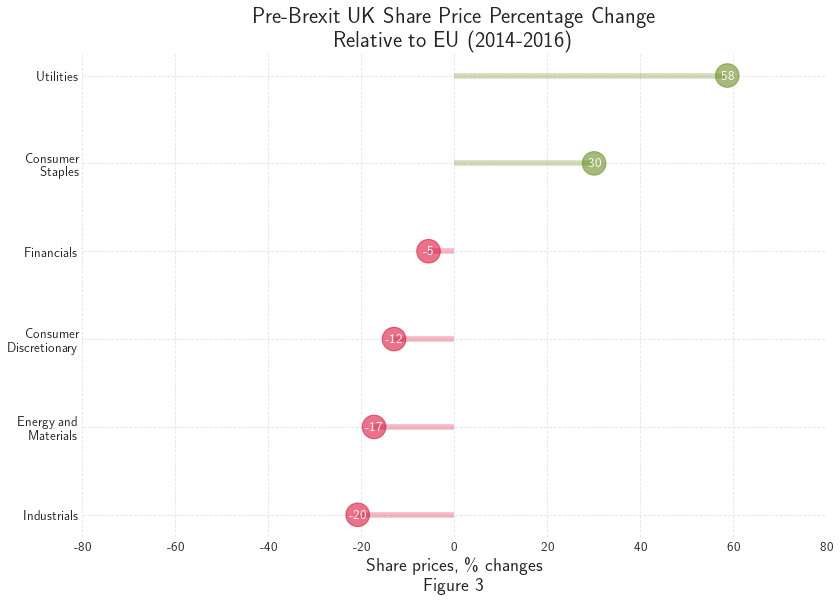

In [98]:
# %% draw plot
plt.style.use('seaborn-whitegrid')
# create plot
fig = plt.figure(figsize=(12,8), dpi= 80)

# create plot
ax2 = fig.add_subplot(1, 1, 1)

# add a horizontal line
ax2.hlines(y=res_preb.index, xmin=0, xmax=res_preb.relative_performance_before_brexit,
           color=res_preb.colors, alpha=0.3, linewidth=5)

# scatter
ax2.scatter(res_preb.relative_performance_before_brexit, res_preb.index, s=450, alpha=.6, color=res_preb.colors)

for x, y, label in zip(res_preb.relative_performance_before_brexit, res_preb.index, res_preb.relative_performance_before_brexit):
    t = ax2.text(x, y, int(label), horizontalalignment='center',
                 verticalalignment='center', fontdict={'color':'white'},fontweight=700,fontsize=12)

# axes
ax2.set_xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80])
ax2.set_xticklabels([-80, -60, -40, -20, 0, 20, 40, 60, 80],fontsize=12,fontweight=575)
ax2.set_yticks(res_preb.index)
ax2.set_yticklabels(res_preb.sector,fontsize=12,fontweight=575)
ax2.set_title('Pre-Brexit UK Share Price Percentage Change\n Relative to EU (2014-2016)', fontsize=20,fontweight=600)
ax2.set_xlabel('Share prices, \% changes\n Figure 3',fontsize=17,fontweight=600)  

# grid
ax2.grid(linestyle='--', alpha=0.5)

# remove spines
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)


plt.show()

### Post-Brexit

In [99]:
# populate a dataframe to use in the post-Brexit visualization
rel_str_pob = [cd_pob,em_pob,i_pob,cs_pob,f_pob,u_pob]
sectors = ['Consumer \n Discretionary', 'Energy and \n Materials', 'Industrials', 'Consumer \n Staples', 'Financials', 'Utilities']
res_prob = pd.DataFrame({'sector' : sectors, 'relative_performance_post_brexit' : rel_str_pob})
res_prob['colors'] = ['crimson' if x < 0 else 'olivedrab' for x in res_prob['relative_performance_post_brexit']]

res_prob.sort_values('relative_performance_post_brexit', inplace=True)
res_prob.reset_index(inplace=True)

pd.set_option('precision', 1)

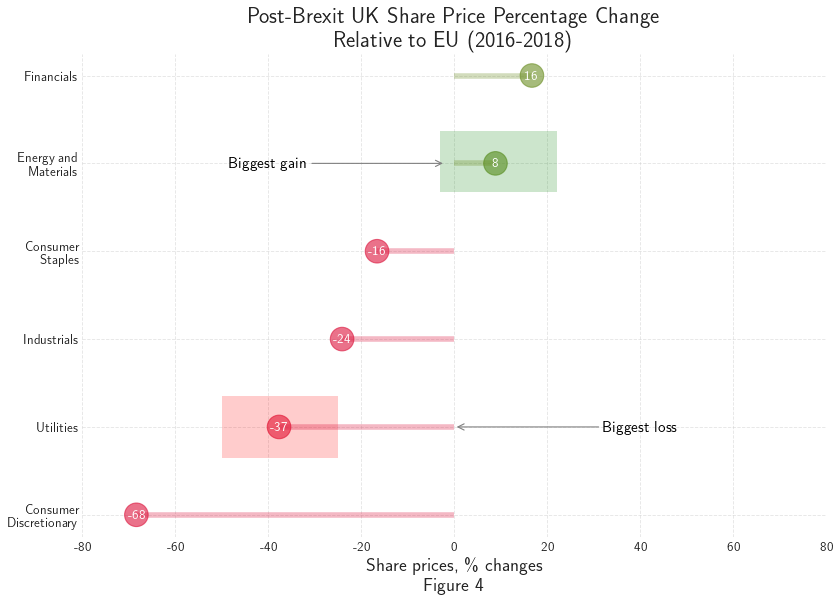

In [100]:
# %% draw plot

# create plot
fig = plt.figure(figsize=(12,8), dpi= 80)

# create plot
ax4 = fig.add_subplot(1, 1, 1)

# scatter
ax4.scatter(res_prob.relative_performance_post_brexit, res_prob.index, s=450, alpha=.6, color=res_prob.colors)

for x, y, label in zip(res_prob.relative_performance_post_brexit, res_prob.index, res_prob.relative_performance_post_brexit):
    t = ax4.text(x, y, int(label), horizontalalignment='center',
                 verticalalignment='center', fontdict={'color':'white'},fontweight=700,fontsize=12)

# add a horizontal line
ax4.hlines(y=res_preb.index, xmin=0, xmax=res_prob.relative_performance_post_brexit,
           color=res_preb.colors, alpha=0.3, linewidth=5)    
    
# axes
ax4.set_xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80])
ax4.set_xticklabels([-80, -60, -40, -20, 0, 20, 40, 60, 80],fontsize=12,fontweight=575)
ax4.set_yticks(res_prob.index)
ax4.set_yticklabels(res_prob.sector,fontsize=12,fontweight=575)
ax4.set_title('Post-Brexit UK Share Price Percentage Change\n Relative to EU (2016-2018)', fontsize=20,fontweight = 600)
ax4.set_xlabel('Share prices, \% changes \n Figure 4',fontsize=17,fontweight=600)

# add patch
p1 = patches.Rectangle((-50, 0.65), width=25, height=0.7, alpha=.2, facecolor='red')
p2 = patches.Rectangle((-3, 3.67), width=25, height=0.7, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# annotations
ax4.annotate('Biggest gain',
             xy=(-2, 4), xytext=(-40, 4), xycoords='data',
             fontsize=14, ha='center', va='center', fontweight=600,
           
             arrowprops=dict(arrowstyle='->',
                            lw=1.0, color='grey'), color='black')
ax4.annotate('Biggest loss',
             xy=(0, 1), xytext=(40, 1), xycoords='data',
             fontsize=14, ha='center', va='center', fontweight=600, 
             
             arrowprops=dict(arrowstyle='->',
                            lw=1.0, color='grey'), color='black')

# remove spines
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)


# grid
ax4.grid(linestyle='--', alpha=0.5)
# ax4.xlim(-2.5, 2.5)

plt.show()

# Manipulate data to find UK assets¶

In [101]:
# groupby year and sector
long = long_uk.groupby([pd.Grouper(key = 'date', freq='Y'), 'sector'])

# sum assets based on year and sector
long = long['assets'].agg(np.sum).reset_index()

# Pre-brexit 
# -- extract pre-brexit years (2014 - 2016)
start = dt.datetime.strptime('2014-12-31', '%Y-%m-%d')
end = dt.datetime.strptime('2016-12-31', '%Y-%m-%d')
long_preb = long.loc[(long.date >= start) & (long.date <= end), :] 

# -- average assets for each sector for 3 years
long_preb = long_preb.groupby(['sector'])
long_preb = long_preb['assets'].agg(np.mean).reset_index()

# -- calculate percentage of each element of the total
long_preb['percent'] = (long_preb['assets'] / long_preb['assets'].sum()) * 100

# Post-brexit
# --extract post-brexit years (2017 - 2018)
start_1 = dt.datetime.strptime('2017-12-31', '%Y-%m-%d')
end_1 = dt.datetime.strptime('2018-12-31', '%Y-%m-%d')
long_posb = long.loc[(long.date >= start_1) & (long.date <= end_1), :]

# -- average the rest
long_posb = long_posb.groupby(['sector'])
long_posb = long_posb['assets'].agg(np.mean).reset_index()



# -- calculate percentage of each element of the total
long_posb['percent'] = (long_posb['assets'] / long_posb['assets'].sum()) * 100


## Pre-Brexit assets donut chart

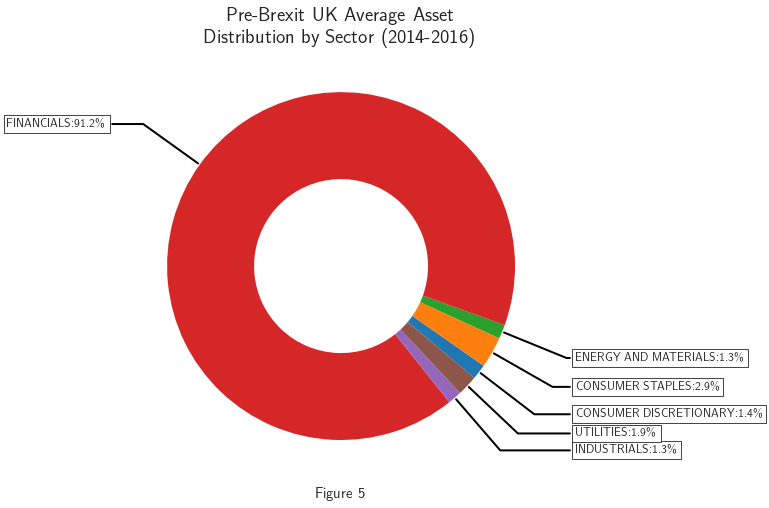

In [102]:
# create plot
fig, ax3 = plt.subplots(figsize=(15, 8)) 
                       
# generate data to fill                      
a = [str(round(i, 1))  for i in long_preb['percent']]
labels = list(long_preb['sector'])
assets = a

# create a donut chart
wedges, texts = ax3.pie(a, wedgeprops=dict(width=0.5), startangle=-40)

# create textboxes and annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-", linewidth=2),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax3.annotate(labels[i].upper() + ':' + a[i] + '\%', xy=(x, y),fontsize=12,fontweight=575, xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

# set title
ax3.set_title("Pre-Brexit UK Average Asset \n Distribution by Sector (2014-2016)",fontsize=20,fontweight=600)
ax3.set_xlabel('Figure 5',fontsize=15,fontweight=600)

plt.show()

## Post-Brexit assets donut chart¶

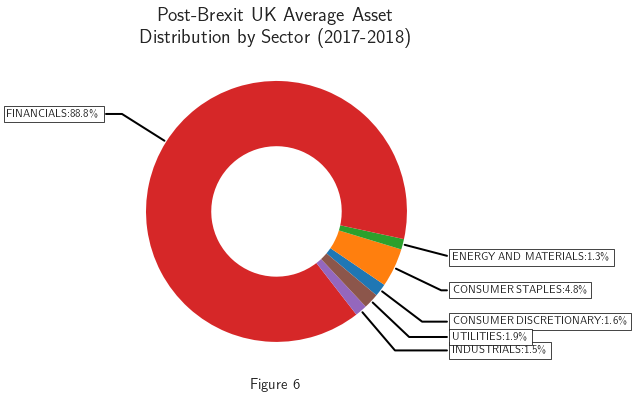

In [103]:
# create plot
fig, ax5 = plt.subplots(figsize=(8, 6),) 
                       
# generate data to fill                       
a = [str(round(i, 1)) for i in long_posb['percent']]
labels = list(long_posb['sector'])
assets = a

# create a donut chart
wedges, texts = ax5.pie(a, wedgeprops=dict(width=0.5), startangle=-40)

# create textboxes and annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-", linewidth=2),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax5.annotate(labels[i].upper() + ':' + a[i] + '\%', xy=(x, y),fontsize=11,fontweight=575, xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

# set title
ax5.set_title("Post-Brexit UK Average Asset \n Distribution by Sector (2017-2018)",fontsize=20,fontweight=600)
ax5.set_xlabel('Figure 6',fontsize=15,fontweight=600)

plt.show()

# Combining all graphs

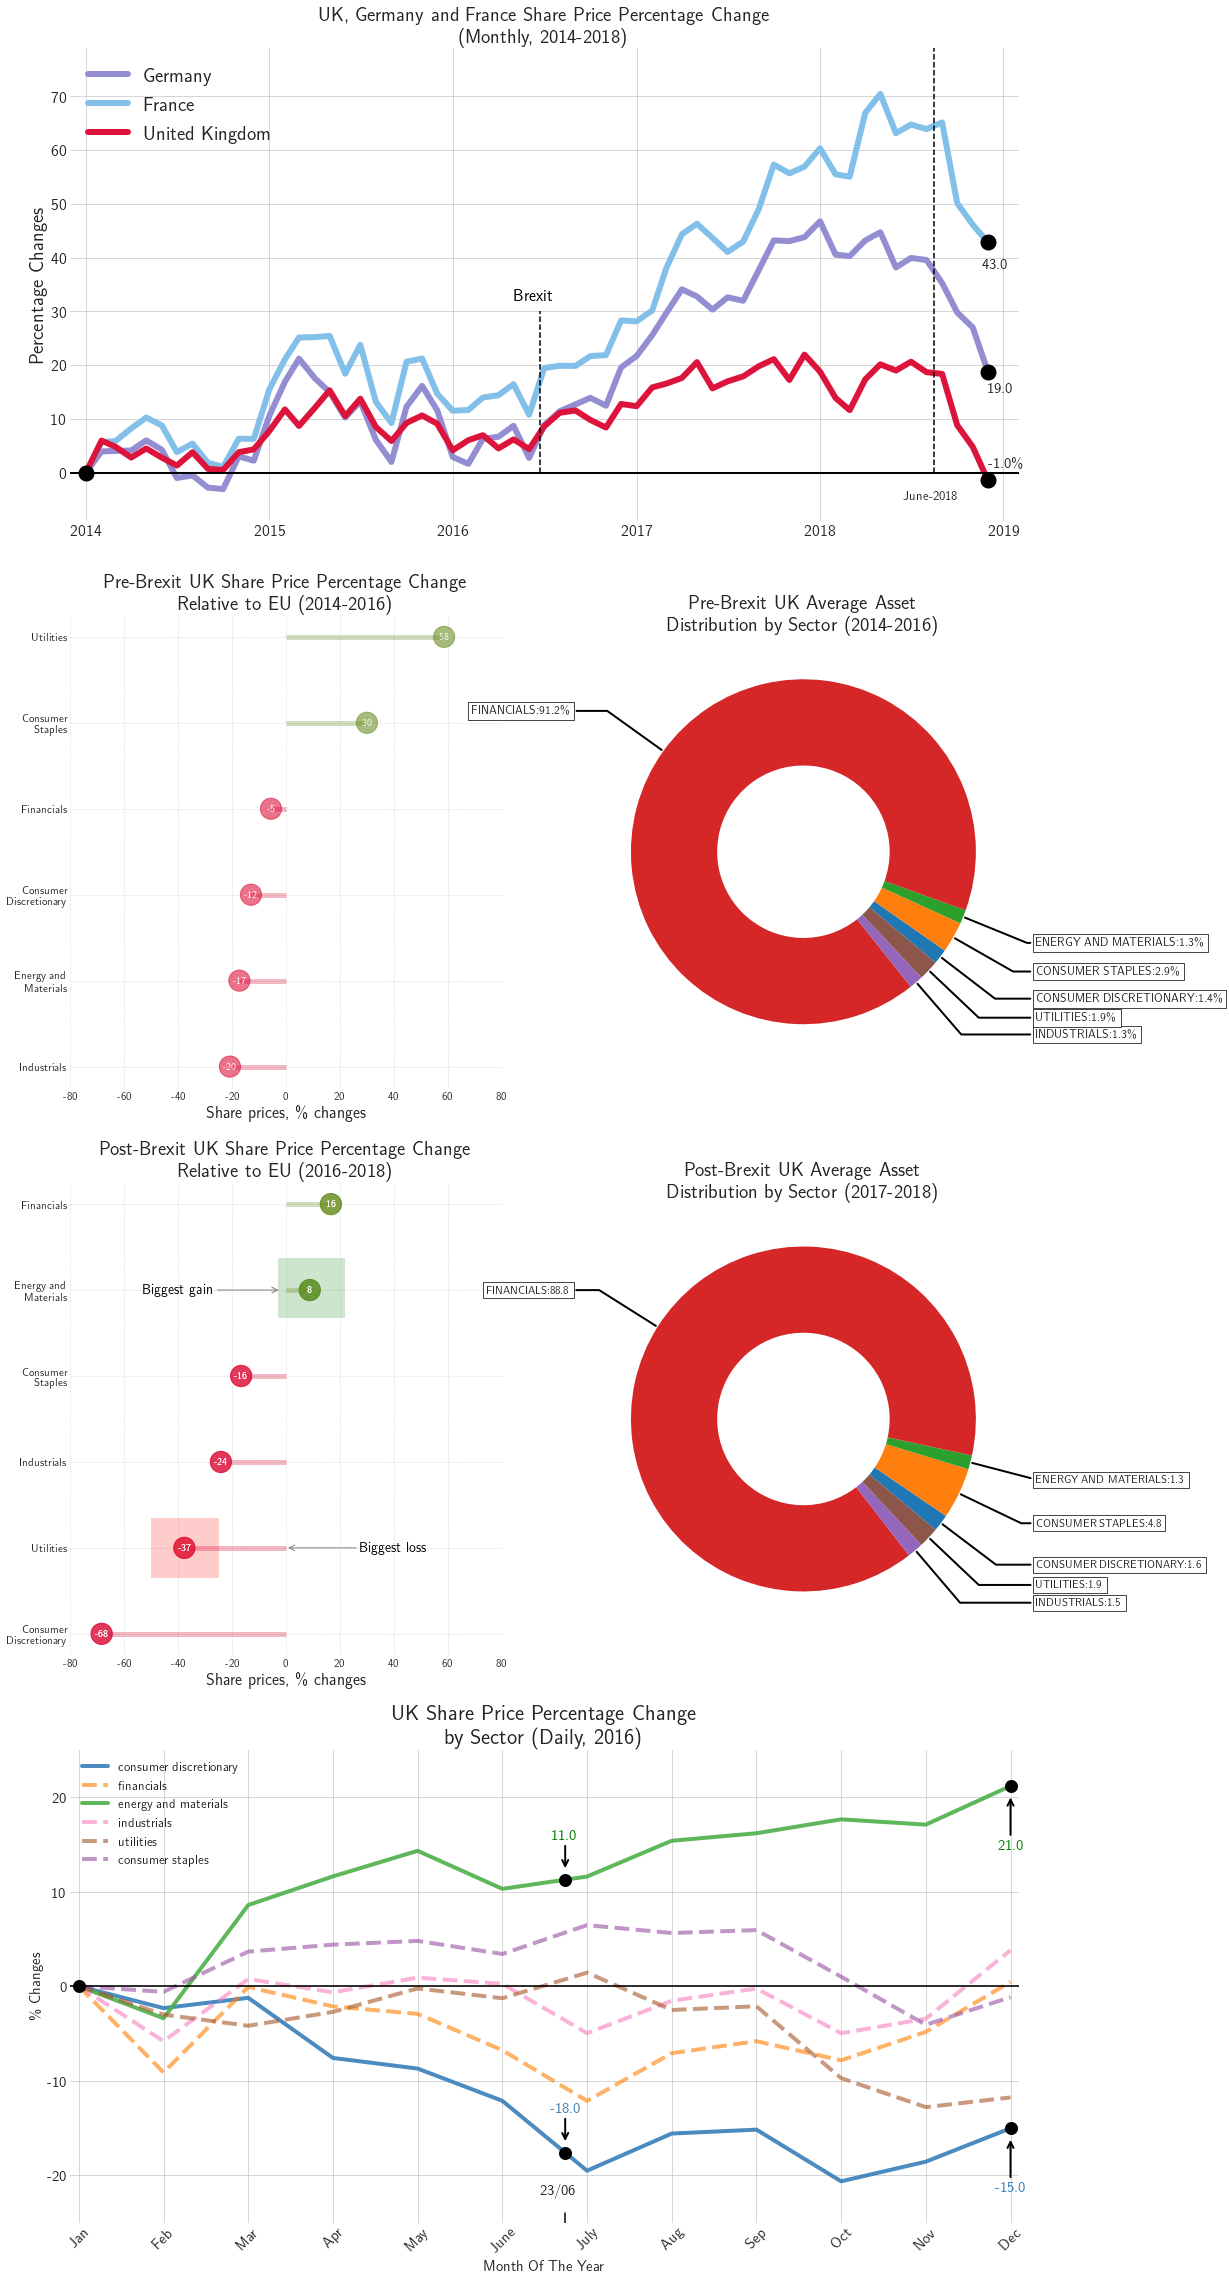

In [104]:
plt.style.use('seaborn-whitegrid')
import matplotlib.gridspec as gs
fig1 = plt.figure(figsize=(17,40))
gs1 = gs.GridSpec(nrows=4,ncols=2)

## First Plot
ax1 = plt.subplot(gs1[0, 0:2])

colors = ['#938DD2', '#82C0E9', 'crimson']
dataframes = [germany_long,france_long,uk_long]
names = ['Germany','France','United Kingdom']
years = [pd.Timestamp(2014,1,1),pd.Timestamp(2015,1,1),pd.Timestamp(2016,1,1),pd.Timestamp(2017,1,1),pd.Timestamp(2018,1,1),pd.Timestamp(2019,1,1)]
x_labels = ['2014','2015','2016','2017','2018','2019']
y_labels = list(range(-10,80,10))

for i in range(3):
    df = dataframes[i]
    ax1.plot(df['date'],df['pct_prices'],label=names[i],lw=6,zorder=1,color=colors[i])
#labels for x-axis
ax1.set_xticks(years)
ax1.set_xticklabels(labels=x_labels,rotation=0,fontsize=16,fontweight=575)
ax1.set_xlim(pd.Timestamp(2013,12,1),pd.Timestamp(2019,2,1)) 

#Horizontal line at 100
ax1.axhline(0,color='black',lw=2)

#Labels for y-axis  
ax1.set_yticks(y_labels)
ax1.set_yticklabels(y_labels,fontsize=16,fontweight=575)
ax1.set_ylim([-9,79])

#Initial index point at 100
ax1.scatter(pd.Timestamp(2014,1,1),0,lw=10,color='black',zorder=2)

#France end of 2018 index point
y_ey = france_long.loc[france_long['date'] == pd.Timestamp(2018,12,1),'pct_prices'].values
ax1.scatter(pd.Timestamp(2018,12,1),y_ey,lw=10,color='black',zorder=2)
ax1.text(pd.Timestamp(2018,11,20),38,str(round(y_ey[0]))+'%',fontsize=15)

#Germany end of 2018 index point
y_ey = germany_long.loc[germany_long['date'] == pd.Timestamp(2018,12,1),'pct_prices'].values
ax1.scatter(pd.Timestamp(2018,12,1),y_ey,lw=10,color='black',zorder=2)
ax1.text(pd.Timestamp(2018,12,1),15,str(round(y_ey[0]))+'%',fontsize=15)

#UK end of 2018 index point
y_ey = uk_long.loc[uk_long['date'] == pd.Timestamp(2018,12,1),'pct_prices'].values
ax1.scatter(pd.Timestamp(2018,12,1),y_ey,lw=10,color='black',zorder=2)
ax1.text(pd.Timestamp(2018,12,1),1,str(round(y_ey[0]))+'\%',fontsize=15)

#Date of brexit
ax1.vlines(pd.Timestamp(2016,6,23),0,30,color='black',ls='--')
ax1.text(pd.Timestamp(2016,5,1),32,'Brexit',color='black',fontweight=700,fontsize=17)


#Date of drop
ax1.vlines(pd.Timestamp(2018,8,15),0,100,color='black',ls='--')
ax1.text(pd.Timestamp(2018,6,15),-5,'June-2018',fontweight=600,fontsize=13)

#Set title
ax1.set_ylabel('Percentage Changes', fontsize=20,fontweight=600)
ax1.set_title('UK, Germany and France Share Price Percentage Change \n (Monthly, 2014-2018)',fontweight=600,fontsize=20)
ax1.legend(loc='upper left',fontsize=20)

ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

## Second Plot
ax2 = plt.subplot(gs1[1, 0])
ax2.hlines(y=res_preb.index, xmin=0, xmax=res_preb.relative_performance_before_brexit,
           color=res_preb.colors, alpha=0.3, linewidth=5)

# scatter
ax2.scatter(res_preb.relative_performance_before_brexit, res_preb.index, s=450, alpha=.6, color=res_preb.colors)

for x, y, label in zip(res_preb.relative_performance_before_brexit, res_preb.index, res_preb.relative_performance_before_brexit):
    t = ax2.text(x, y, int(label), horizontalalignment='center',
                 verticalalignment='center', fontdict={'color':'white'})

# axes
ax2.set_xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80])
ax2.set_xticklabels([-80, -60, -40, -20, 0, 20, 40, 60, 80],fontsize=11,fontweight=575)
ax2.set_yticks(res_preb.index)
ax2.set_yticklabels(res_preb.sector,fontsize=11,fontweight=575)
ax2.set_title('Pre-Brexit UK Share Price Percentage Change\n Relative to EU (2014-2016)', fontsize=20,fontweight=600)
ax2.set_xlabel('Share prices, \% changes',fontsize=17,fontweight=600)  

# grid
ax2.grid(linestyle='--', alpha=0.5)

# remove spines
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

## Third Plot
ax3 = plt.subplot(gs1[1, 1])

a = [str(round(i, 1))  for i in long_preb['percent']]
labels = list(long_preb['sector'])
assets = a

# create a donut chart
wedges, texts = ax3.pie(a, wedgeprops=dict(width=0.5), startangle=-40)

# create textboxes and annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-", linewidth=2),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax3.annotate(labels[i].upper() + ':' + a[i] + '\%', xy=(x, y),fontsize=12,fontweight=575, xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

# set title
ax3.set_title("Pre-Brexit UK Average Asset \n Distribution by Sector (2014-2016)",fontsize=20,fontweight=600)

## Fourth Plot
ax4 = plt.subplot(gs1[2, 0])

ax4.scatter(res_prob.relative_performance_post_brexit, res_prob.index, s=450, alpha=.6, color=res_prob.colors)

for x, y, label in zip(res_prob.relative_performance_post_brexit, res_prob.index, res_prob.relative_performance_post_brexit):
    t = ax4.text(x, y, int(label), horizontalalignment='center',
                 verticalalignment='center', fontdict={'color':'white'})

# add a horizontal line
ax4.scatter(res_prob.relative_performance_post_brexit, res_prob.index, s=450, alpha=.6, color=res_prob.colors)

for x, y, label in zip(res_prob.relative_performance_post_brexit, res_prob.index, res_prob.relative_performance_post_brexit):
    t = ax4.text(x, y, int(label), horizontalalignment='center',
                 verticalalignment='center', fontdict={'color':'white'})

# add a horizontal line
ax4.hlines(y=res_prob.index, xmin=0, xmax=res_prob.relative_performance_post_brexit,
           color=res_prob.colors, alpha=0.3, linewidth=5)    
    
# axes
ax4.set_xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80])
ax4.set_xticklabels([-80, -60, -40, -20, 0, 20, 40, 60, 80],fontsize=11,fontweight=575)
ax4.set_yticks(res_prob.index)
ax4.set_yticklabels(res_prob.sector,fontsize=11,fontweight=575)
ax4.set_title('Post-Brexit UK Share Price Percentage Change\n Relative to EU (2016-2018)', fontsize=20,fontweight = 600)
ax4.set_xlabel('Share prices, \% changes',fontsize=17,fontweight=600)

# add patch
p1 = patches.Rectangle((-50, 0.65), width=25, height=0.7, alpha=.2, facecolor='red')
p2 = patches.Rectangle((-3, 3.67), width=25, height=0.7, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# annotations
ax4.annotate('Biggest gain',
             xy=(-2, 4), xytext=(-40, 4), xycoords='data',
             fontsize=14, ha='center', va='center', fontweight=600,
           
             arrowprops=dict(arrowstyle='->',
                            lw=1.0, color='grey'), color='black')
ax4.annotate('Biggest loss',
             xy=(0, 1), xytext=(40, 1), xycoords='data',
             fontsize=14, ha='center', va='center', fontweight=600,
             
             arrowprops=dict(arrowstyle='->',
                            lw=1.0, color='grey'), color='black')

# remove spines
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)


# grid
ax4.grid(linestyle='--', alpha=0.5)


## Fifth Plot
plt.style.use('seaborn-white')
ax5 = plt.subplot(gs1[2, 1])

a = [str(round(i, 1)) for i in long_posb['percent']]
labels = list(long_posb['sector'])
assets = a

# create a donut chart
wedges, texts = ax5.pie(a, wedgeprops=dict(width=0.5), startangle=-40)

# create textboxes and annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-", linewidth=2),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax5.annotate(labels[i].upper() + ':' + a[i] + '%', xy=(x, y),fontsize=11,fontweight=575, xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

# set title
ax5.set_title("Post-Brexit UK Average Asset \n Distribution by Sector (2017-2018)",fontsize=20,fontweight=600)

## Sixth Plot
plt.style.use('seaborn-whitegrid')
ax6 = plt.subplot(gs1[3, 0:2])
linestyle = ['solid', 'dashed', 'dashdot', 'solid', 'dashed', 'dashdot',]
colors = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3']
sectors = short['sector'].unique()
brexit_date = 5+23/31
months = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
numeric_months = [0,1,2,3,4,5,6,7,8,9,10,11]
                  
df = uk_short                                   
for i in range(6):
    sector = sectors[i]
    selected_rows = df[df['sector'] ==sector]
    if i not in [0,2]:
        ax6.plot(selected_rows['month'],selected_rows['pct_prices'],label=str(sector),lw=4,ls=linestyle[1],alpha=0.6,color=colors[i],zorder=1)
    if i in [0,2]:
        ax6.plot(selected_rows['month'],selected_rows['pct_prices'],label=str(sector),lw=4,ls=linestyle[3],alpha=0.9,color=colors[i],zorder=1)
        
        
        x = selected_rows['month']
        y = selected_rows['pct_prices']
        y_bx = np.interp(brexit_date+1, x,y)
        y_ey = np.interp(12, x,y)
        x_scatter = [brexit_date,11]
        y_scatter = [y_bx,y_ey]
        ax6.scatter(x_scatter,y_scatter,lw=7,color='black',zorder=2)

##Text for energy and materials
selected_rows = df[df['sector'] ==sectors[2]]
x = selected_rows['month']
y = selected_rows['pct_prices']
y_bx = np.interp(brexit_date+1, x,y)
y_ey = np.interp(12, x,y)

##Brexit
ax6.annotate(str(round(y_bx))+'%',
            xy=(brexit_date, y_bx+1),color='green',fontsize=15,xycoords='data',va="bottom", 
            ha="center",xytext=(brexit_date, y_bx+4),
            arrowprops=dict(arrowstyle="->",color='black',lw=2),)

##Scatter at origin
ax6.scatter(0,0,lw=7,color='black',zorder=2)

##End of year
ax6.annotate(str(round(y_ey))+'%',
            xy=(11, y_ey-1),color='green',fontsize=15,xycoords='data',va="bottom", 
            ha="center",xytext=(11, y_ey-7),
            arrowprops=dict(arrowstyle="->",color='black',lw=2),)

##Text for consumer discretionary
selected_rows = df[df['sector'] ==sectors[0]]
x = selected_rows['month']
y = selected_rows['pct_prices']
y_bx = np.interp(brexit_date+1, x,y)
y_ey = np.interp(12, x,y)

##Brexit
ax6.annotate(str(round(y_bx))+'%',
            xy=(brexit_date, y_bx+1),color=colors[0],fontsize=15,xycoords='data',va="bottom", 
            ha="center",xytext=(brexit_date, y_bx+4),
            arrowprops=dict(arrowstyle="->",color='black',lw=2),)

##End of year
ax6.annotate(str(round(y_ey))+'%',
            xy=(11, y_ey-1),color=colors[0],fontsize=15,xycoords='data',va="bottom", 
            ha="center",xytext=(11, y_ey-7),
            arrowprops=dict(arrowstyle="->",color='black',lw=2),)

##Text for brexit date
ax6.axvline(brexit_date,0,0.02,color='black',lw=1.5)
ax6.text(brexit_date-0.3,-22,'23/06',fontsize=15,fontweight=575)

#Customizing x and y tick labels
ax6.set_ylim([-25,25])
ax6.set_yticks([-20,-10,0,10,20])
ax6.set_yticklabels(labels=[-20,-10,0,10,20],fontsize=15,fontweight=575)
ax6.set_xlim([-0.1,11.1])
ax6.set_xticks(numeric_months)
ax6.set_xticklabels(labels=months,rotation=45,fontsize=15,fontweight=575)

#Delete top and right spines
ax6.spines["right"].set_visible(False)
ax6.spines["top"].set_visible(False)

#Legends and Labels
ax6.legend(loc='upper left',fontsize=13)
ax6.set_xlabel('Month Of The Year',fontsize=15,fontweight=600)  
ax6.set_ylabel('\% Changes',fontsize=15,fontweight=600)   

#Set Title
ax6.set_title('UK Share Price Percentage Change \n by Sector (Daily, 2016)',fontweight=600,fontsize=22)  

ax6.spines['right'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['bottom'].set_visible(False)
#Horizontal Line at 100
ax6.axhline(0,color='black',alpha=0.8,lw=2) 
plt.show()